# K-means Clustering

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.cm as cm

### Generating and plotting data 

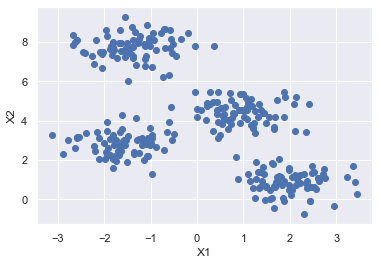

In [2]:
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state = 0)

plt.scatter(X[:,0], X[:,1])

plt.xlabel("X1")
plt.ylabel("X2")

plt.show()


### Visualizing Clusters 

In [3]:
# creating the Kmeans obejct 
kmeans = KMeans(n_clusters = 4, random_state = 0)

# fitting the data
kmeans.fit(X)

# making prediction
labels = kmeans.predict(X)

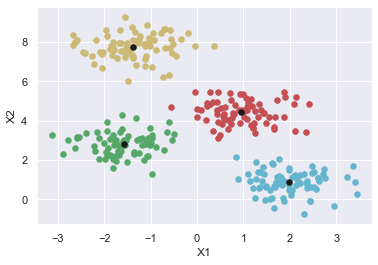

In [4]:
idx_0 = np.where(labels == 0)
idx_1 = np.where(labels == 1)
idx_2 = np.where(labels == 2)
idx_3 = np.where(labels == 3)

plt.scatter(X[idx_0,0], X[idx_0,1], s=30, c='c', marker = "o")
plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='r', marker = "o")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='y', marker = "o")
plt.scatter(X[idx_3,0], X[idx_3,1], s=30, c='g', marker = "o")

centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], s = 30, c = "k", marker = "o")

plt.xlabel("X1")
plt.ylabel("X2")

plt.show()



## K-means

find_clusters() is a K-means function that finds the clusters and returns labels/ centers. It takes the dataset, number of clusters and the seed as input then initializes the centers and continuously updates them until they converge.

In [5]:
def find_clusters(X, n_clusters, rseed=2):
    
    # randomly choosing n_clusters centers
    r = np.random.RandomState(seed = rseed)
    c = r.permutation(X)[0:n_clusters]
    
    # initializing convergence to 0
    convergence = 0
    
    # initializing list to store previous centers
    oldC = []
    for s in range(n_clusters):
        oldC.append(c[s])
    
    # iterate until convergence is reached (convergence = 1)
    while convergence == 0:
        
        convergence = 1
        
        # calculate distances between each point and center and assigning them labels accordingly
        i = pairwise_distances_argmin(X,c,metric = "euclidean")
        
        # copying current centers into oldC
        oldC = c.copy()
     
        # calculating mean of each cluster to update each of the centers
        for k in range(n_clusters):
            idx = np.where(i == k)
            c[k][0] = np.mean(X[idx,0])
            c[k][1] = np.mean(X[idx,1])

        # checking for convergence (if the old centers = new centers)
        for n in range(n_clusters):
            # set convergence to 0 if the old and new centers do not match
            if (c[n][0]!=oldC[n][0] or c[n][1]!=oldC[n][1]):
                convergence = 0
                
    # return the centers and labels
    return c, i


### Fitting function to the dataset and visualizing results

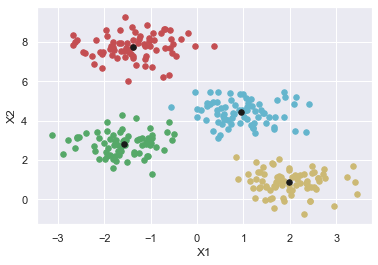

In [6]:
# fitting function to the data set with the starting point rseed=2.
Kcenters, Klabels = find_clusters(X, 4, 2)

# plotting the clusters
Kidx_0 = np.where(Klabels == 0)
Kidx_1 = np.where(Klabels == 1)
Kidx_2 = np.where(Klabels == 2)
Kidx_3 = np.where(Klabels == 3)

plt.scatter(X[Kidx_0,0], X[Kidx_0,1], s=30, c='c', marker = "o")
plt.scatter(X[Kidx_1,0], X[Kidx_1,1], s=30, c='r', marker = "o")
plt.scatter(X[Kidx_2,0], X[Kidx_2,1], s=30, c='y', marker = "o")
plt.scatter(X[Kidx_3,0], X[Kidx_3,1], s=30, c='g', marker = "o")


plt.scatter(Kcenters[:,0], Kcenters[:,1], s = 30, c = "k", marker = "o")

plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

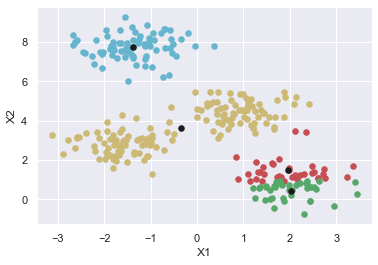

In [7]:
# fiting function to the data set with the starting point rseed=0.
Kcenters0, Klabels0 = find_clusters(X, 4, 0)

K0idx_0 = np.where(Klabels0 == 0)
K0idx_1 = np.where(Klabels0 == 1)
K0idx_2 = np.where(Klabels0 == 2)
K0idx_3 = np.where(Klabels0 == 3)

plt.scatter(X[K0idx_0,0], X[K0idx_0,1], s=30, c='c', marker = "o")
plt.scatter(X[K0idx_1,0], X[K0idx_1,1], s=30, c='r', marker = "o")
plt.scatter(X[K0idx_2,0], X[K0idx_2,1], s=30, c='y', marker = "o")
plt.scatter(X[K0idx_3,0], X[K0idx_3,1], s=30, c='g', marker = "o")


plt.scatter(Kcenters0[:,0], Kcenters0[:,1], s = 30, c = "k", marker = "o")

plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

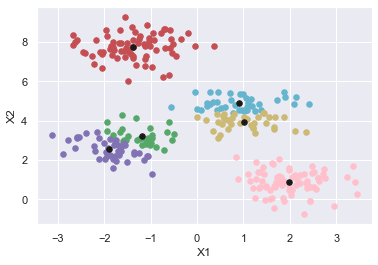

In [8]:
# fitting function to the data set with the starting point rseed=2 k=6.
K6centers, K6labels = find_clusters(X, 6, 2)

K6idx_0 = np.where(K6labels == 0)
K6idx_1 = np.where(K6labels == 1)
K6idx_2 = np.where(K6labels == 2)
K6idx_3 = np.where(K6labels == 3)
K6idx_4 = np.where(K6labels == 4)
K6idx_5 = np.where(K6labels == 5)

plt.scatter(X[K6idx_0,0], X[K6idx_0,1], s=30, c='c', marker = "o")
plt.scatter(X[K6idx_1,0], X[K6idx_1,1], s=30, c='r', marker = "o")
plt.scatter(X[K6idx_2,0], X[K6idx_2,1], s=30, c='y', marker = "o")
plt.scatter(X[K6idx_3,0], X[K6idx_3,1], s=30, c='g', marker = "o")
plt.scatter(X[K6idx_4,0], X[K6idx_4,1], s=30, c='pink', marker = "o")
plt.scatter(X[K6idx_5,0], X[K6idx_5,1], s=30, c='m', marker = "o")

plt.scatter(K6centers[:,0], K6centers[:,1], s = 30, c = "k", marker = "o")

plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

### Comparing Results

Since K-means is very sensitive to center initialization, changing the seed that initialized the randomized centers produced different results. When seed = 2, it converged correctly, however when seed = 0, the centers initialized at first were not well chosen centers, so the clusters did not converge correctly: one center was linked with multiple clusters and two other centers were sharing one cluster. When k = 6, the algorithm divided the data into 6 clusters, expectedly.

## K-means++

eucl_dist() takes 2 points as inputs and returns the euclidean distance between them.

In [9]:
def eucl_dist(a, b, axis=1):
    
    distance = np.linalg.norm(a - b)
    
    return distance

### Initializing Centers
Function to initialize the centers for K-means++. It takes the data, number of clusters, and seed as input and returns the centers.

In [10]:
def init_center(k,X,rseed):
    
    centers = []
    
    # randomly choosing first center
    r = np.random.RandomState(seed = rseed)
    c = r.permutation(X)[0:1]
    centers.append([c[0][0], c[0][1]])
    
    # genereating the next centers based on the probability distribution 
    while (len(centers)<k):
        dj = []
        pj = []
        
        # calculating and storing distance between each point and the closest previously chosen center     
        for point in X:
            d = float('inf')
            for i in range(len(centers)):
                d_t = eucl_dist(point, centers[i])
                d = min(d_t,d)
            dj.append(d)
            
        
        # calculating probability distribution
        pj = np.square(dj)/(np.square(dj).sum())  
        
        # choosing new center based on probability distribution
        j = np.random.choice(a = len(X),p = pj)
        centers.append([X[j][0],X[j][1]])
    
    # return all centers
    return centers

### K-means++ function
Function to run k-means on initialized centers. It takes the dataset and the number of clusters as input and returns the centers of the clusters and their labels.

In [11]:
def kmpp(X,n_clusters,rseed):
    
    c = init_center(n_clusters,X,rseed)
    
    c = np.array(c)

    convergence = 0
    
    oldC = []
    
    for s in range(n_clusters):
        oldC.append(c[s])
        
    while convergence == 0:
        convergence = 1
        
        i = pairwise_distances_argmin(X,c,metric = "euclidean")
        
        oldC = c.copy()
     
        for k in range(n_clusters):
            idx = np.where(i == k)
            c[k][0] = np.mean(X[idx,0])
            c[k][1] = np.mean(X[idx,1])


        for n in range(n_clusters):
            if (c[n][0]!=oldC[n][0] or c[n][1]!=oldC[n][1]):
                convergence = 0
                
    return c, i

### Fitting and visualizing data

[[ 0.94973532  4.41906906]
 [ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


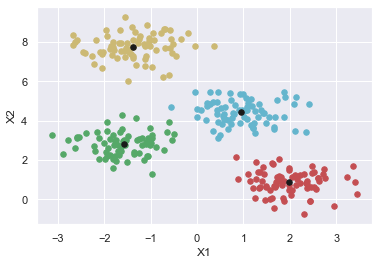

In [12]:
# fitting kmean++ function to the data set with rseed=0.
Kppcenters = []
Kpplabels = []
Kppcenters, Kpplabels = kmpp(X, 4, 0)

print(Kppcenters)

Kidx_0 = np.where(Kpplabels == 0)
Kidx_1 = np.where(Kpplabels == 1)
Kidx_2 = np.where(Kpplabels == 2)
Kidx_3 = np.where(Kpplabels == 3)

plt.scatter(X[Kidx_0,0], X[Kidx_0,1], s=30, c='c', marker = "o")
plt.scatter(X[Kidx_1,0], X[Kidx_1,1], s=30, c='r', marker = "o")
plt.scatter(X[Kidx_2,0], X[Kidx_2,1], s=30, c='y', marker = "o")
plt.scatter(X[Kidx_3,0], X[Kidx_3,1], s=30, c='g', marker = "o")

plt.scatter(Kppcenters[:,0], Kppcenters[:,1], s = 30, c = "k", marker = "o")

plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

[[-1.37324398  7.75368871]
 [ 0.94973532  4.41906906]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]]


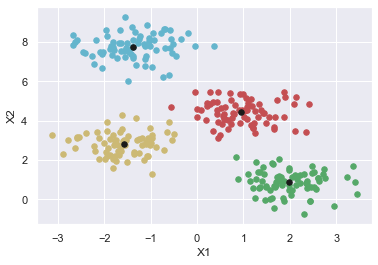

In [13]:
# fit our kmean++ function to the data set with rseed=2.
Kppcenters2 = [] 
Kpplabels2 = []
Kppcenters2, Kpplabels2 = kmpp(X, 4, 2)

print(Kppcenters2)

idx_0 = np.where(Kpplabels2 == 0)
idx_1 = np.where(Kpplabels2 == 1)
idx_2 = np.where(Kpplabels2 == 2)
idx_3 = np.where(Kpplabels2 == 3)

plt.scatter(X[idx_0,0], X[idx_0,1], s=30, c='c', marker = "o")
plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='r', marker = "o")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='y', marker = "o")
plt.scatter(X[idx_3,0], X[idx_3,1], s=30, c='g', marker = "o")

plt.scatter(Kppcenters2[:,0], Kppcenters2[:,1], s = 30, c = "k", marker = "o")

plt.xlabel("X1")
plt.ylabel("X2")

plt.show()

### Comparing Results

The way the centers are initialized in K-means++ makes this method more robust. Changing the seed (2 or 0) did not affect the results since it started with better centroids. Comparing these results to K-mean, K-mean++ was a lot less sensitive to the value of the seed, since the initialization of the centers is not a completely random process, but based on only one randomly generated center. The rest of the centers are generated based on the probability distribution that derives from that center, so the algorithm ensures that the centroids will be initialized in a way that will allow them to converge.